<a href="https://colab.research.google.com/github/mg253a/Challenge1/blob/main/Challenge1_DataScience_mike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [42]:
#SOLUCION 1_Cálculo individual por tienda:
# Calcular el ingreso total de cada tienda
ingreso_tienda = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Ingreso total Tienda 1: ${ingreso_tienda:,.2f}")
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")

Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


In [43]:
#SOLUCION 2_Usando un bucle para evitar repetición
# Lista de DataFrames y nombres de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calcular y mostrar ingresos
for df, nombre in zip(tiendas, nombres):
    ingreso = df['Precio'].sum()
    print(f"{nombre}: ${ingreso:,.2f}")

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [44]:
#SOLUCION 3_Crear un DataFrame resumen:
import pandas as pd

# Diccionario para almacenar resultados
resultados = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        tienda['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]
}

# Convertir a DataFrame y mostrar
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


# 2. Ventas por categoría

In [45]:
#SOLUCION 1_Conteo por categoría en cada tienda (individual):
# Conteo de productos por Categoría del Producto en cada tienda
ventas_tienda1 = tienda['Categoría del Producto'].value_counts().reset_index()
ventas_tienda1.columns = ['Categoría del Producto', 'Ventas_Tienda1']

ventas_tienda2 = tienda2['Categoría del Producto'].value_counts().reset_index()
ventas_tienda2.columns = ['Categoría del Producto', 'Ventas_Tienda2']

ventas_tienda3 = tienda3['Categoría del Producto'].value_counts().reset_index()
ventas_tienda3.columns = ['Categoría del Producto', 'Ventas_Tienda3']

ventas_tienda4 = tienda4['Categoría del Producto'].value_counts().reset_index()
ventas_tienda4.columns = ['Categoría del Producto', 'Ventas_Tienda4']

# Mostrar resultados
print("Tienda 1:")
print(ventas_tienda1)
print("\nTienda 2:")
print(ventas_tienda2)
print("\nTienda 3:")
print(ventas_tienda3)
print("\nTienda 4:")
print(ventas_tienda4)

Tienda 1:
    Categoría del Producto  Ventas_Tienda1
0                  Muebles             465
1             Electrónicos             448
2                 Juguetes             324
3        Electrodomésticos             312
4     Deportes y diversión             284
5   Instrumentos musicales             182
6                   Libros             173
7  Artículos para el hogar             171

Tienda 2:
    Categoría del Producto  Ventas_Tienda2
0                  Muebles             442
1             Electrónicos             422
2                 Juguetes             313
3        Electrodomésticos             305
4     Deportes y diversión             275
5   Instrumentos musicales             224
6                   Libros             197
7  Artículos para el hogar             181

Tienda 3:
    Categoría del Producto  Ventas_Tienda3
0                  Muebles             499
1             Electrónicos             451
2                 Juguetes             315
3        Electrodomést

In [46]:
#SOLUCION 2_Usando un bucle para automatizar:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, df in enumerate(tiendas):
    ventas = df['Categoría del Producto'].value_counts().reset_index()
    ventas.columns = ['Categoría del Producto', 'Total_Ventas']
    print(f"\n{nombres[i]}:")
    print(ventas)


Tienda 1:
    Categoría del Producto  Total_Ventas
0                  Muebles           465
1             Electrónicos           448
2                 Juguetes           324
3        Electrodomésticos           312
4     Deportes y diversión           284
5   Instrumentos musicales           182
6                   Libros           173
7  Artículos para el hogar           171

Tienda 2:
    Categoría del Producto  Total_Ventas
0                  Muebles           442
1             Electrónicos           422
2                 Juguetes           313
3        Electrodomésticos           305
4     Deportes y diversión           275
5   Instrumentos musicales           224
6                   Libros           197
7  Artículos para el hogar           181

Tienda 3:
    Categoría del Producto  Total_Ventas
0                  Muebles           499
1             Electrónicos           451
2                 Juguetes           315
3        Electrodomésticos           278
4     Deportes y diversi

In [48]:
#SOLUCION 3_Consolidar todos los resultados en un solo DataFrame:
# Unir todos los conteos en un DataFrame comparativo
from functools import reduce

ventas_tiendas = [
    tienda['Categoría del Producto'].value_counts().rename('Tienda'),
    tienda2['Categoría del Producto'].value_counts().rename('Tienda2'),
    tienda3['Categoría del Producto'].value_counts().rename('Tienda3'),
    tienda4['Categoría del Producto'].value_counts().rename('Tienda4')
]

df_ventas = pd.concat(ventas_tiendas, axis=1).fillna(0)
df_ventas['Total'] = df_ventas.sum(axis=1)
df_ventas = df_ventas.sort_values('Total', ascending=False)

print("\nResumen de ventas por categoría en todas las tiendas:")
print(df_ventas)


Resumen de ventas por categoría en todas las tiendas:
                         Tienda  Tienda2  Tienda3  Tienda4  Total
Categoría del Producto                                           
Muebles                     465      442      499      480   1886
Electrónicos                448      422      451      451   1772
Juguetes                    324      313      315      338   1290
Electrodomésticos           312      305      278      254   1149
Deportes y diversión        284      275      277      277   1113
Instrumentos musicales      182      224      177      170    753
Libros                      173      197      185      187    742
Artículos para el hogar     171      181      177      201    730


In [35]:
#Categorías más populares en cada tienda:
for col in df_ventas.columns[:-1]:  # Excluir la columna 'Total'
    print(f"\nCategoría más vendida en {col}:")
    print(df_ventas[col].idxmax(), "->", df_ventas[col].max(), "unidades")


Categoría más vendida en Tienda:
Muebles -> 465 unidades

Categoría más vendida en Tienda2:
Muebles -> 442 unidades

Categoría más vendida en Tienda3:
Muebles -> 499 unidades

Categoría más vendida en Tienda4:
Muebles -> 480 unidades


In [36]:
#Filtrar categorías con bajas ventas:
df_ventas[df_ventas['Total'] > 100]  # Mostrar solo categorías con +100 ventas

,Tienda,Tienda2,Tienda3,Tienda4,Total
Categoría del Producto,,,,,
Muebles,465,442,499,480,1886
Electrónicos,448,422,451,451,1772
Juguetes,324,313,315,338,1290
Electrodomésticos,312,305,278,254,1149
Deportes y diversión,284,275,277,277,1113
Instrumentos musicales,182,224,177,170,753
Libros,173,197,185,187,742
Artículos para el hogar,171,181,177,201,730


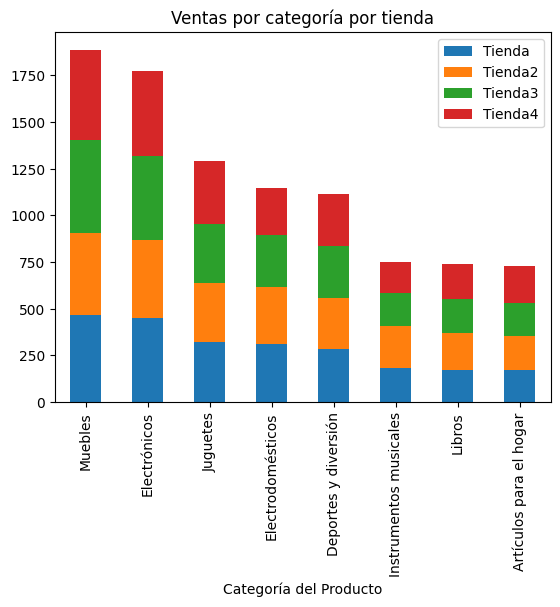

In [37]:
#Visualización (con Matplotlib/Seaborn):
import matplotlib.pyplot as plt
df_ventas.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.title('Ventas por categoría por tienda')
plt.show()

# 3. Calificación promedio de la tienda


In [49]:
#SOLUCION 1_Cálculo individual por tienda:
#Cálculo individual por tienda
# Calcular el promedio de calificaciones para cada tienda
promedio_tienda1 = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

# Mostrar resultados
print(f"Calificación promedio Tienda 1: {promedio_tienda1:.2f}/5")
print(f"Calificación promedio Tienda 2: {promedio_tienda2:.2f}/5")
print(f"Calificación promedio Tienda 3: {promedio_tienda3:.2f}/5")
print(f"Calificación promedio Tienda 4: {promedio_tienda4:.2f}/5")

Calificación promedio Tienda 1: 3.98/5
Calificación promedio Tienda 2: 4.04/5
Calificación promedio Tienda 3: 4.05/5
Calificación promedio Tienda 4: 4.00/5


In [50]:
#SOLUCION 2_Usando un bucle (eficiente para múltiples tiendas):
#Usando un bucle (eficiente para múltiples tiendas)
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for df, nombre in zip(tiendas, nombres):
    promedio = df['Calificación'].mean()
    print(f"{nombre}: {promedio:.2f}/5")

Tienda 1: 3.98/5
Tienda 2: 4.04/5
Tienda 3: 4.05/5
Tienda 4: 4.00/5


In [51]:
#SOLUCION 3_DataFrame resumen con estadísticas:
import pandas as pd

resultados = {
    "Tienda": nombres,
    "Calificación Promedio": [df['Calificación'].mean() for df in tiendas],
    "Calificación Máxima": [df['Calificación'].max() for df in tiendas],
    "Calificación Mínima": [df['Calificación'].min() for df in tiendas]
}

df_calificaciones = pd.DataFrame(resultados)
print(df_calificaciones)

     Tienda  Calificación Promedio  Calificación Máxima  Calificación Mínima
0  Tienda 1               3.976685                    5                    1
1  Tienda 2               4.037304                    5                    1
2  Tienda 3               4.048326                    5                    1
3  Tienda 4               3.995759                    5                    1


In [53]:
#Verificar distribución de calificaciones:
tienda['Calificación'].value_counts().sort_index()

,count
Calificación,
1,319
2,86
3,218
4,444
5,1292


In [54]:
#Filtrar calificaciones bajas (<3):
insatisfechos = tienda[tienda['Calificación'] < 3].shape[0]
print(f"Clientes insatisfechos en Tienda 1: {insatisfechos}")

Clientes insatisfechos en Tienda 1: 405


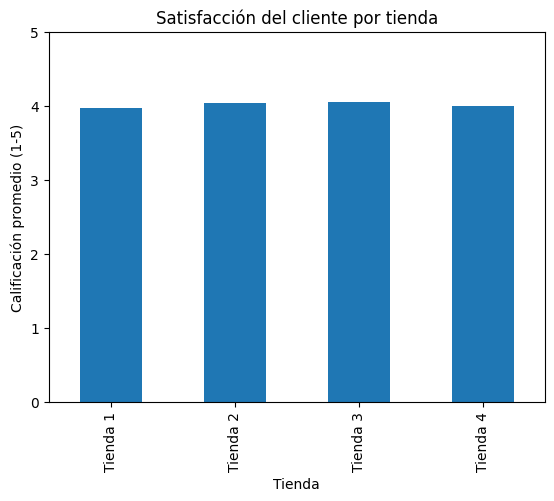

In [56]:
#Visualización:
import matplotlib.pyplot as plt
df_calificaciones.plot(x='Tienda', y='Calificación Promedio', kind='bar', legend=False)
plt.title('Satisfacción del cliente por tienda')
plt.ylabel('Calificación promedio (1-5)')
plt.ylim(0, 5)
plt.show()

# 4. Productos más y menos vendidos

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Diccionario para almacenar resultados
resultados = {}

for df, nombre in zip(tiendas, nombres):
    # Conteo de productos vendidos (asumiendo columna 'Producto')
    ventas = df['Producto'].value_counts().reset_index()
    ventas.columns = ['Producto', 'Total_Ventas']

    # Producto más vendido
    mas_vendido = ventas.loc[ventas['Total_Ventas'].idxmax()]
    # Producto menos vendido (excluyendo posibles ceros)
    menos_vendido = ventas.loc[ventas['Total_Ventas'].idxmin()]

    resultados[nombre] = {
        'Más vendido': mas_vendido['Producto'],
        'Cantidad (Más vendido)': mas_vendido['Total_Ventas'],
        'Menos vendido': menos_vendido['Producto'],
        'Cantidad (Menos vendido)': menos_vendido['Total_Ventas']
    }

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados).T
print("\nResumen de productos más y menos vendidos por tienda:")
print(df_resultados)


Resumen de productos más y menos vendidos por tienda:
                        Más vendido Cantidad (Más vendido)  \
Tienda 1                 Microondas                     60   
Tienda 2  Iniciando en programación                     65   
Tienda 3              Kit de bancas                     57   
Tienda 4                   Cama box                     62   

                      Menos vendido Cantidad (Menos vendido)  
Tienda 1  Auriculares con micrófono                       33  
Tienda 2              Juego de mesa                       32  
Tienda 3    Bloques de construcción                       35  
Tienda 4         Guitarra eléctrica                       33  


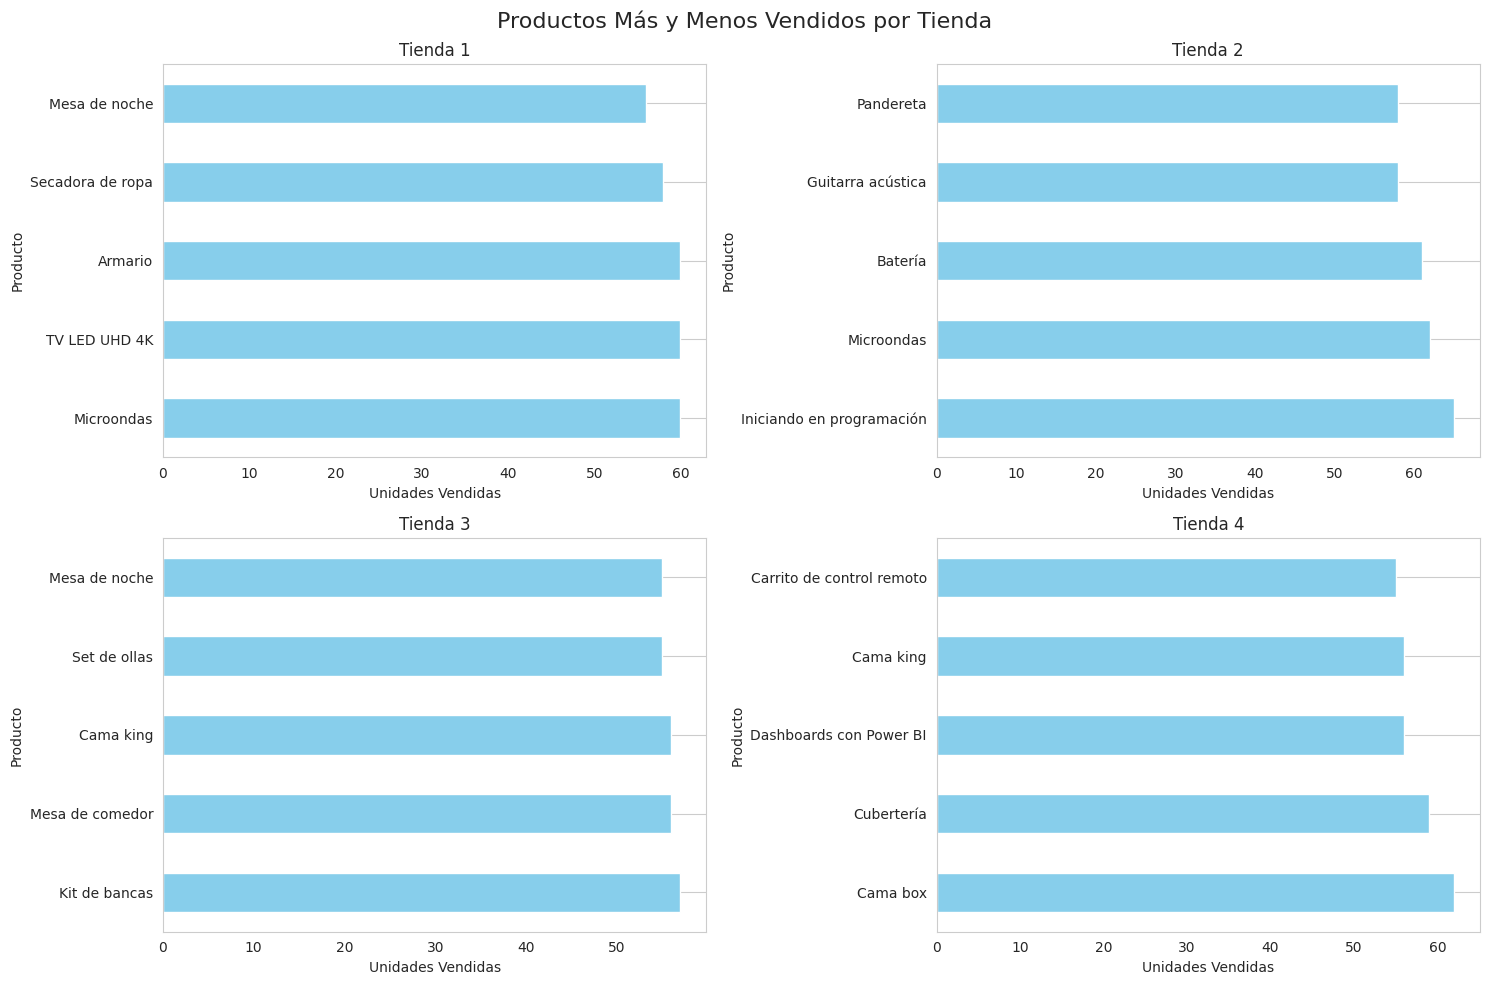

In [68]:
#Visualización de Resultados_Gráfico de barras comparativas por tienda:

# Configurar estilo
import seaborn as sns
sns.set_style("whitegrid")

# Crear subplots para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Productos Más y Menos Vendidos por Tienda', fontsize=16)

for i, (df, nombre) in enumerate(zip(tiendas, nombres)):
    ax = axes[i//2, i%2]  # Posición del subplot
    ventas = df['Producto'].value_counts().nlargest(5)  # Top 5 productos
    ventas.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(nombre)
    ax.set_xlabel('Unidades Vendidas')
    ax.set_ylabel('Producto')
    ax.grid(axis='x')

plt.tight_layout()
plt.show()

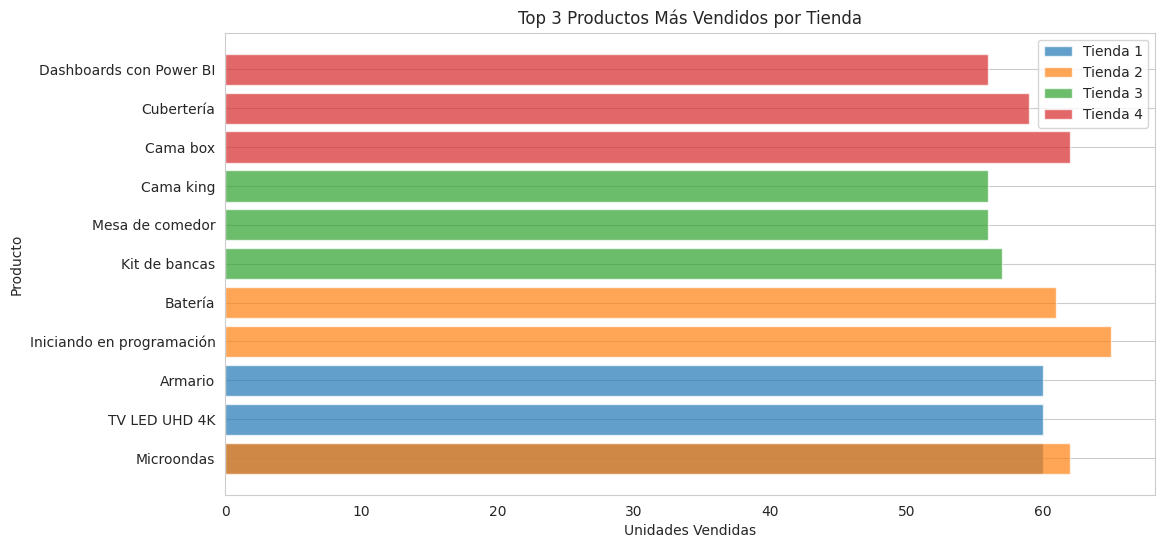

In [69]:
#Visualización de Resultados_Gráfico combinado (todas las tiendas):
# Top 3 productos por tienda
plt.figure(figsize=(12, 6))
for df, nombre in zip(tiendas, nombres):
    top_productos = df['Producto'].value_counts().nlargest(3)
    plt.barh(top_productos.index, top_productos.values, label=nombre, alpha=0.7)

plt.title('Top 3 Productos Más Vendidos por Tienda')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Producto')
plt.legend()
plt.grid(axis='x')
plt.show()

# 5. Envío promedio por tienda

In [72]:
#Cálculo del Costo de Envío Promedio por Tienda
import pandas as pd

# Lista de DataFrames y nombres de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Diccionario para almacenar resultados
resultados_envio = {}

for df, nombre in zip(tiendas, nombres):
    # Calcular el costo promedio de envío (asumiendo columna 'Costo_Envío')
    costo_promedio = df['Costo de envío'].mean()
    resultados_envio[nombre] = costo_promedio

# Convertir a DataFrame
df_envios = pd.DataFrame(list(resultados_envio.items()), columns=['Tienda', 'Costo_Envío_Promedio'])
print("\nCosto de envío promedio por tienda:")
print(df_envios)


Costo de envío promedio por tienda:
     Tienda  Costo_Envío_Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


<Figure size 1000x500 with 0 Axes>

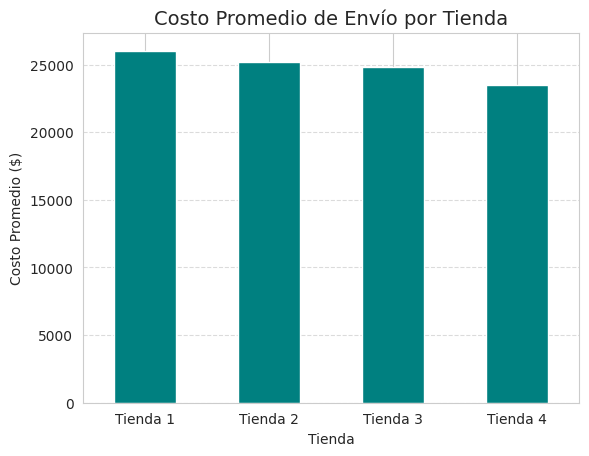

In [73]:
#Visualización de Resultados
#Gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df_envios.plot(x='Tienda', y='Costo_Envío_Promedio', kind='bar', color='teal', legend=False)
plt.title('Costo Promedio de Envío por Tienda', fontsize=14)
plt.ylabel('Costo Promedio ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

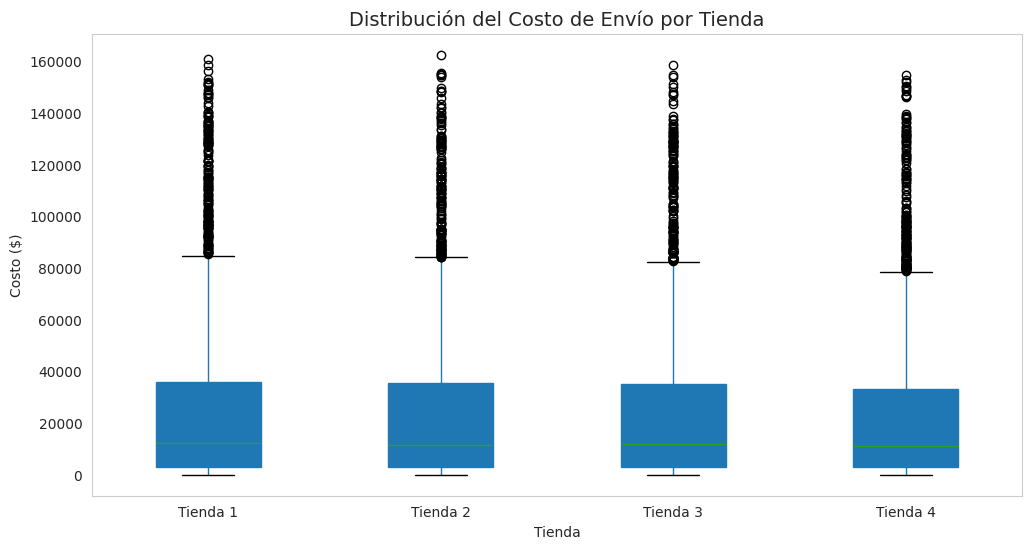

In [77]:
#Gráfico de caja
# Combinar datos de envíos con el nombre de la tienda
datos_envios = []
for df, nombre in zip(tiendas, nombres):
    datos_envios.append(df['Costo de envío'].rename(nombre))

df_combinado = pd.concat(datos_envios, axis=1)

# Boxplot
plt.figure(figsize=(12, 6))
df_combinado.boxplot(grid=False, vert=True, patch_artist=True)
plt.title('Distribución del Costo de Envío por Tienda', fontsize=14)
plt.ylabel('Costo ($)')
plt.xlabel('Tienda')
plt.show()

In [80]:
#Identificar envíos con costos atípicos
for df, nombre in zip(tiendas, nombres):
    Q1 = df['Costo de envío'].quantile(0.25)
    Q3 = df['Costo de envío'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Costo de envío'] < (Q1 - 1.5 * IQR)) | (df['Costo de envío'] > (Q3 + 1.5 * IQR))]
    print(f"\n{nombre} - Envíos atípicos: {outliers.shape[0]}")


Tienda 1 - Envíos atípicos: 177

Tienda 2 - Envíos atípicos: 166

Tienda 3 - Envíos atípicos: 156

Tienda 4 - Envíos atípicos: 183
